# 타이틀을 의미

## 작은타이틀

### 그다음 작은타이틀

## kaggle

- kaggle 은 무엇인가요?
- 빅데이터 솔루션 , 모델 개발 경진대회 플랫폼 
- 구글이 인수

,Survived,Dead
female,233,81
male,109,468


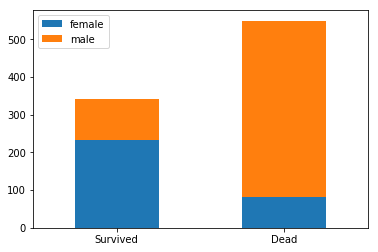

female    233
male      109
Name: Survived, dtype: int64

In [374]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv("./data/titanic/train.csv")
#display(train)

test = pd.read_csv("./data/titanic/test.csv")
#display(test)


#display(train.info()) # 무작정 평균 나이 데이터 넣는것보다 남녀 구분지어서 남평균 녀평균 넣으면 결과가 더좋음

def show_chart(param):
    survived = train.loc[train["Survived"]==1,param].value_counts()
    survived.name="Survived"
    dead=train.loc[train["Survived"]==0,param].value_counts()
    dead.name="Dead"
    df1=pd.DataFrame(survived)
    
    
    df2=pd.DataFrame(dead)
    df=df1.join(df2)
    
    display(df)
    df=df.transpose()
    df.plot(kind="bar" , stacked=True)
    plt.xticks(rotation=0)
    plt.show()
    
    display(survived)
    


show_chart("Sex")


## 생각해봐야하는 것들

*성별에 male , female 이렇게 되어있는 것을 수치로 전환
*Age 에 NaN 처리 (모든 사람의 평균 , 남자여자의 평균...)
*Age는 10대 20대 30대 범주로 나누어서 빈도를 이용해 처리
*sequential 한 데이터를 category 형태로 전환 ->  binning
*Fare에 값 1개가 빠져있었다 채워줘야함
*Fare에 값이 크기때문에 normalization 처리
*Pclass에 대한 처리가 필요
*SibSp,Parch 에 대한 처리 ~이게 필요할까? 어떻게 이용하지?




In [23]:
#1
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv("./data/titanic/train.csv")
display(train["Sex"]=="male" )

display(train["Sex"]=="male"  )
train.loc[train["Sex"]=="male","Sex"]=1
train.loc[train["Sex"]=="female","Sex"]=0
display(train)

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16      True
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869     True
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16      True
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869     True
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [24]:
#2
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv("./data/titanic/train.csv")


#df.loc[df["이름"] =="박동훈","이름":"학점"]

train.loc[train["Sex"]=="male","Sex"]=1
train.loc[train["Sex"]=="female","Sex"]=0

#display(train.loc[train["Sex"]==1])

train.Age=train.Age.fillna(0)
#display(train.loc[train["Age"]==0])


#print(train['Name'].str.strip("Mrs"))
#print(train.loc[train.Name.str.contains('Mrs'),"Age"].mean()) # 30.9
#print(train.loc[train.Name.str.contains('Mr'),"Age"].mean()) # 26.15
#print(train.loc[train[train.Name.str.contains('Mrs')],"Age"])
#display(train.Name.str.contains('Mrs'))
#display(train)
#train1=train.loc[train.Name.str.contains('Mrs'),"Age"]==0
#display(train.loc[train.Name.str.contains('Mrs'),"Age"]==0 )

print(train["Age"].mean())

train.loc[(train.Name.str.contains('Mrs'))&(train["Age"]==0),"Age"]=31

train.loc[(train.Name.str.contains('Mr'))&(train["Age"]==0),"Age"]=26
#print(train["Age"].mean()) # 27.86326599326599

train.loc[train["Age"]==0,"Age"]=23


#display((train.Name.str.contains('Mrs'))&(train["Age"]==0) )


display(train)
#display(train.loc[train.Name.str.contains('Mrs'),"Age"]==0)

#train.loc[train.loc[train.Name.str.contains('Mrs'),"Age"]==0,"Age"]=30.9
#train.loc[train["Age"]==0,"Age"]=31

#train2=train1[train1.Name.str.contains('Mr')]
#train.loc[train["Age"]==0,"Age"]=26

#display(train2)



23.79929292929293


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,26.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [25]:
#3,4
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv("./data/titanic/train.csv")

train.loc[train["Sex"]=="male","Sex"]=1
train.loc[train["Sex"]=="female","Sex"]=0


train.Age=train.Age.fillna(0)


train.loc[(train.Name.str.contains('Mrs'))&(train["Age"]==0),"Age"]=31

train.loc[(train.Name.str.contains('Mr'))&(train["Age"]==0),"Age"]=26


train.loc[train["Age"]==0,"Age"]=23

display(train["Age"].notnull().sum())

display(train[(23>=train["Age"])&(train["Age"]>0)].notnull().sum())
display(train[(31>=train["Age"])&(train["Age"]>23)].notnull().sum())
display(train[(81>=train["Age"])&(train["Age"]>31)].notnull().sum())
display(train["Age"].max())
display(train["Age"].min())

display(train[(23>=train["Age"])&(train["Age"]>0)],"Age")


n=np.array(train["Age"])
print(n)
n1=[]
n2=[]
n3=[]

for i in train["Age"]:
    
    if (23>=i) & (i>0):
        n1.append(1)
        n2.append(0)
        n3.append(0)
    elif (31>=i) & (i>23):
        n1.append(0)
        n2.append(1)
        n3.append(0)
    elif (81>=i) & (i>31):
        n1.append(0)
        n2.append(0)
        n3.append(1)
train["Age1"]=n1
train["Age2"]=n2
train["Age3"]=n3
        
train.drop('Age', axis=1, inplace=True)


display(train)

#display(train.loc[train[(23>=train["Age"])&(train["Age"]>0)],"Age"])

# train["Age1"]=train[(23>=train["Age"])&(train["Age"]>0)]
# train["Age2"]=train[(31>=train["Age"])&(train["Age"]>23)]
# train["Age3"]=train[(81>=train["Age"])&(train["Age"]>31)]

# display(train)

891

PassengerId    287
Survived       287
Pclass         287
Name           287
Sex            287
Age            287
SibSp          287
Parch          287
Ticket         287
Fare           287
Cabin           41
Embarked       287
dtype: int64

PassengerId    318
Survived       318
Pclass         318
Name           318
Sex            318
Age            318
SibSp          318
Parch          318
Ticket         318
Fare           318
Cabin           52
Embarked       318
dtype: int64

PassengerId    286
Survived       286
Pclass         286
Name           286
Sex            286
Age            286
SibSp          286
Parch          286
Ticket         286
Fare           286
Cabin          111
Embarked       284
dtype: int64

80.0

0.42

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.00,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",1,20.00,0,0,A/5. 2151,8.0500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,14.00,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",1,2.00,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",0,15.00,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",0,8.00,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.00,3,2,19950,263.0000,C23 C25 C27,S


'Age'

[22.   38.   26.   35.   35.   26.   54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.   26.   31.   31.   35.   34.   15.   28.
  8.   38.   26.   19.   23.   26.   40.   31.   23.   66.   28.   42.
 26.   21.   18.   14.   40.   27.   26.    3.   19.   26.   26.   23.
 26.   18.    7.   21.   49.   29.   65.   26.   21.   28.5   5.   11.
 22.   38.   45.    4.   26.   23.   29.   19.   17.   26.   32.   16.
 21.   26.   32.   25.   26.   26.    0.83 30.   22.   29.   23.   28.
 17.   33.   16.   26.   23.   24.   29.   20.   46.   26.   59.   26.
 71.   23.   34.   34.   28.   26.   21.   33.   37.   28.   21.   26.
 38.   23.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.
 21.   26.   32.5  32.5  54.   12.   26.   24.   23.   45.   33.   20.
 47.   29.   25.   23.   19.   37.   16.   24.   31.   22.   24.   19.
 18.   19.   27.    9.   36.5  42.   51.   22.   55.5  40.5  26.   51.
 16.   30.   26.   23.   44.   40.   26.   17.    1.    9.   31.   45.
 26.  

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1,Age2,Age3
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,NaN,S,1,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,NaN,S,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,30.0708,NaN,C,1,0,0


In [26]:
#5
from sklearn.preprocessing import MinMaxScaler


#display(train)
#mms = MinMaxScaler().fit_transform(train["Fare"].values)

df1=pd.DataFrame(train["Fare"])
#print(df1)
mms = MinMaxScaler().fit_transform(df1.values)



train["Fare"]=mms

print(train["Fare"].mean()) # 0.06285842768394742


train.Fare=train.Fare.fillna(0.06285842768394742)

display(train)

#print(k.values)
#mms = MinMaxScaler().fit_transform(train["Fare"].values)
#x_data = MinMaxScaler().fit_transform(data_x.values)
#print(mms)


0.06285842768394742


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1,Age2,Age3
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.014151,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,0.139136,C85,C,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.015469,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,0.103644,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.015713,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",1,0,0,330877,0.016510,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,0.101229,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,0.041136,NaN,S,1,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,0.021731,NaN,S,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,0.058694,NaN,C,1,0,0


In [27]:
#6

train.loc[train["Pclass"]==3,"Pclass"]=4
train.loc[train["Pclass"]==1,"Pclass"]=3
train.loc[train["Pclass"]==4,"Pclass"]=1

display(train)





,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1,Age2,Age3
0,1,0,1,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.014151,NaN,S,1,0,0
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,0.139136,C85,C,0,0,1
2,3,1,1,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.015469,NaN,S,0,1,0
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,0.103644,C123,S,0,0,1
4,5,0,1,"Allen, Mr. William Henry",1,0,0,373450,0.015713,NaN,S,0,0,1
5,6,0,1,"Moran, Mr. James",1,0,0,330877,0.016510,NaN,Q,0,1,0
6,7,0,3,"McCarthy, Mr. Timothy J",1,0,0,17463,0.101229,E46,S,0,0,1
7,8,0,1,"Palsson, Master. Gosta Leonard",1,3,1,349909,0.041136,NaN,S,1,0,0
8,9,1,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,0.021731,NaN,S,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,0.058694,NaN,C,1,0,0


In [28]:
# 필요없는거 드랍




train.drop("Name",axis=1, inplace=True)
train.drop("Ticket",axis=1, inplace=True)
train.drop("Cabin",axis=1, inplace=True)
train.drop("Embarked",axis=1, inplace=True)
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Age1,Age2,Age3
0,1,0,1,1,1,0,0.014151,1,0,0
1,2,1,3,0,1,0,0.139136,0,0,1
2,3,1,1,0,0,0,0.015469,0,1,0
3,4,1,3,0,1,0,0.103644,0,0,1
4,5,0,1,1,0,0,0.015713,0,0,1
5,6,0,1,1,0,0,0.016510,0,1,0
6,7,0,3,1,0,0,0.101229,0,0,1
7,8,0,1,1,3,1,0.041136,1,0,0
8,9,1,1,0,0,2,0.021731,0,1,0
9,10,1,2,0,1,0,0.058694,1,0,0


In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings

display(train)
dff=pd.DataFrame(train)
#and 연산 

dff.drop("PassengerId",axis=1, inplace=True)
y_data=dff["Survived"].values.reshape(-1,1)
x_data=dff.drop("Survived",axis=1, inplace=False).values

display(dff)
# print(x_data)
# print(y_data)

# #print(x_data)
# #print(y_data)

# X = tf.placeholder(shape=[None,8],dtype = tf.float32  ) #행 숫자는 무상관
# Y = tf.placeholder(shape=[None,1],dtype = tf.float32  )

# W= tf.Variable(tf.random_normal([8,256]), name="weight")
# b= tf.Variable(tf.random_normal([256]),name="bias")

# keep = tf.placeholder(dtype = tf.float32)



# _layer1 = tf.nn.relu(tf.matmul(X,W)+b )
# layer1 = tf.nn.dropout(_layer1 , keep_prob=keep)

# W2 = tf.Variable(tf.random_normal([256,512]), name ="weight2")
# b2 = tf.Variable(tf.random_normal([512]), name ="bias2")

# _layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
# layer2 = tf.nn.dropout(_layer2, keep_prob = keep)


# W3 = tf.Variable(tf.random_normal([512,10]), name ="weight3")
# b3 = tf.Variable(tf.random_normal([10]), name ="bias3")

# logit = tf.matmul(layer2,W3)+b3

# H=tf.nn.relu(logit)


# cost= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit , labels=Y))

# train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# sess = tf.Session()

# sess.run(tf.global_variables_initializer())

# for step in range(3000):
#     _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data} )
#     if step%300 == 0 :
#         print("cost:{}".format(cost_val))

# predict = tf.cast(H>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
#                                             #0.5보다 크면 1로 떨어짐
# correct = tf.equal(predict,Y) #실데이터와 예측한 것을 비교하는것 

# accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

# print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_anddata,Y:y_anddata} ) ))




        




,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Age1,Age2,Age3
0,1,0,1,1,1,0,0.014151,1,0,0
1,2,1,3,0,1,0,0.139136,0,0,1
2,3,1,1,0,0,0,0.015469,0,1,0
3,4,1,3,0,1,0,0.103644,0,0,1
4,5,0,1,1,0,0,0.015713,0,0,1
5,6,0,1,1,0,0,0.016510,0,1,0
6,7,0,3,1,0,0,0.101229,0,0,1
7,8,0,1,1,3,1,0.041136,1,0,0
8,9,1,1,0,0,2,0.021731,0,1,0
9,10,1,2,0,1,0,0.058694,1,0,0


,Survived,Pclass,Sex,SibSp,Parch,Fare,Age1,Age2,Age3
0,0,1,1,1,0,0.014151,1,0,0
1,1,3,0,1,0,0.139136,0,0,1
2,1,1,0,0,0,0.015469,0,1,0
3,1,3,0,1,0,0.103644,0,0,1
4,0,1,1,0,0,0.015713,0,0,1
5,0,1,1,0,0,0.016510,0,1,0
6,0,3,1,0,0,0.101229,0,0,1
7,0,1,1,3,1,0.041136,1,0,0
8,1,1,0,0,2,0.021731,0,1,0
9,1,2,0,1,0,0.058694,1,0,0


In [78]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
tf.reset_default_graph()



print(x_data)
print(y_data)

#print(x_data)
#print(y_data)

X = tf.placeholder(shape=[None,8],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,1],dtype = tf.float32  )

W= tf.Variable(tf.random_normal([8,512]), name="weight")
b= tf.Variable(tf.random_normal([512]),name="bias")

keep = tf.placeholder(dtype = tf.float32)

_layer1 = tf.nn.relu(tf.matmul(X,W)+b )
layer1 = tf.nn.dropout(_layer1 , keep_prob=keep)

W2=tf.get_variable("weight4" , shape=[512,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name ="bias2")

_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep)

#

W3=tf.get_variable("weight5" , shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]), name ="bias3")

logit = tf.matmul(layer2,W3)+b3

H=tf.nn.relu(logit)


cost= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit , labels=Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(300):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data,keep:0.7} )
    if step%30 == 0 :
        print("cost:{}".format(cost_val))

        
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)

print(predict)

#정확도 출력
print(sess.run(accuracy, feed_dict={X:x_data,Y:y_data , keep:1}))        
        

# predict = tf.cast(H>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
#                                             #0.5보다 크면 1로 떨어짐
# correct = tf.equal(predict,Y) #실데이터와 예측한 것을 비교하는것 

# accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

# print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x_anddata,Y:y_anddata} ) ))




        






[[1. 1. 1. ... 1. 0. 0.]
 [3. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [3. 1. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 1.]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]

ValueError: Variable weight4 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\gpu_env\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)


In [43]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings




print(x_data)
print(y_data)

X = tf.placeholder(shape=[None,8],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,1],dtype = tf.float32  )


keep = tf.placeholder(dtype = tf.float32)


W1 = tf.Variable(tf.random_normal([8,5]), name ="weight1")
b1 = tf.Variable(tf.random_normal([5]), name ="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([5,10]), name ="weight2")
b2 = tf.Variable(tf.random_normal([10]), name ="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([10,2]), name ="weight3")
b3 = tf.Variable(tf.random_normal([2]), name ="bias3")

H = tf.matmul(layer2,W3) +b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = H,labels=Y))

#6. Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

#7. Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data} )
    if step%3000 == 0 :
        print("cost:{}".format(cost_val))


        
predict=tf.argmax(H,1)
correct=tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("="*10)

#정확도 출력
print(sess.run(accuracy, feed_dict={X:x_data,Y:y_data }))


[[1. 1. 1. ... 1. 0. 0.]
 [3. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [3. 1. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 1.]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]

In [42]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



test = pd.read_csv("./data/titanic/test.csv")


test.loc[test["Sex"]=="male","Sex"]=1
test.loc[test["Sex"]=="female","Sex"]=0

test.Age=test.Age.fillna(0)


display(test)

test.loc[(test.Name.str.contains('Mrs'))&(test["Age"]==0),"Age"]=31

test.loc[(test.Name.str.contains('Mr'))&(test["Age"]==0),"Age"]=26


test.loc[test["Age"]==0,"Age"]=23


m=np.array(test["Age"])

m1=[]
m2=[]
m3=[]

for i in test["Age"]:
    
    if (23>=i) & (i>0):
        m1.append(1)
        m2.append(0)
        m3.append(0)
    elif (31>=i) & (i>23):
        m1.append(0)
        m2.append(1)
        m3.append(0)
    elif (81>=i) & (i>31):
        m1.append(0)
        m2.append(0)
        m3.append(1)
test["Age1"]=m1
test["Age2"]=m2
test["Age3"]=m3
        
test.drop('Age', axis=1, inplace=True)

ddf1=pd.DataFrame(test["Fare"])

mmms = MinMaxScaler().fit_transform(ddf1.values)



test["Fare"]=mmms




test.Fare=test.Fare.fillna(0.06285842768394742)



test.loc[test["Pclass"]==3,"Pclass"]=4
test.loc[test["Pclass"]==1,"Pclass"]=3
test.loc[test["Pclass"]==4,"Pclass"]=1

test.drop("Name",axis=1, inplace=True)
test.drop("Ticket",axis=1, inplace=True)
test.drop("Cabin",axis=1, inplace=True)
test.drop("Embarked",axis=1, inplace=True)
test

ddff=pd.DataFrame(test)
#and 연산 

ddff.drop("PassengerId",axis=1, inplace=True)

xx_data=ddff.values



dddff=pd.DataFrame({"Survived","Passenger"})

# for step1 in range(len(xx_data+1)):

y_value = sess.run(y_data, feed_dict={X:xx_data}).values

print("============")
dddff["Survived"]= y_value
print( dddff)
# print(y_value)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S


TypeError: Fetch argument array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int64) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)

In [55]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings





train = pd.read_csv("./data/titanic/train.csv")


train.loc[train["Sex"]=="male","Sex"]=1
train.loc[train["Sex"]=="female","Sex"]=0

train.Age=train.Age.fillna(0)


train.loc[(train.Name.str.contains('Mrs'))&(train["Age"]==0),"Age"]=31

train.loc[(train.Name.str.contains('Mr'))&(train["Age"]==0),"Age"]=26


train.loc[train["Age"]==0,"Age"]=23


n=np.array(train["Age"])

n1=[]
n2=[]
n3=[]

for i in train["Age"]:
    
    if (23>=i) & (i>0):
        n1.append(1)
        n2.append(0)
        n3.append(0)
    elif (31>=i) & (i>23):
        n1.append(0)
        n2.append(1)
        n3.append(0)
    elif (81>=i) & (i>31):
        n1.append(0)
        n2.append(0)
        n3.append(1)
train["Age1"]=n1
train["Age2"]=n2
train["Age3"]=n3
        
train.drop('Age', axis=1, inplace=True)

df1=pd.DataFrame(train["Fare"])

mms = MinMaxScaler().fit_transform(df1.values)



train["Fare"]=mms




train.Fare=train.Fare.fillna(0.06285842768394742)



train.loc[train["Pclass"]==3,"Pclass"]=4
train.loc[train["Pclass"]==1,"Pclass"]=3
train.loc[train["Pclass"]==4,"Pclass"]=1

train.drop("Name",axis=1, inplace=True)
train.drop("Ticket",axis=1, inplace=True)
train.drop("Cabin",axis=1, inplace=True)
train.drop("Embarked",axis=1, inplace=True)
train


dff=pd.DataFrame(train)
#and 연산 




dff.drop("PassengerId",axis=1, inplace=True)
y_data=dff["Survived"].values.reshape(-1,1)
x_data=dff.drop("Survived",axis=1, inplace=False).values

print(len(x_data)*2/3)

print(len(x_data)/3)

number=int(len(x_data)*2/3)
x1_data=x_data[0:number]
x2_data=x_data[number:-1]

y1_data=y_data[0:number]
y2_data=y_data[number:-1]



X = tf.placeholder(shape=[None,8],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,1],dtype = tf.float32  )


keep = tf.placeholder(dtype = tf.float32)



w=tf.Variable(tf.random_normal([8,1]),name="weight" )  
b=tf.Variable(tf.random_normal([1]) , name="bias")
print("w:{}".format(w.get_shape()))
# h=tf.matmul(x,w)+b #멀티플에 하이파시스 여서 배열곱 x,w해줌
logit=tf.matmul(X,w)+b

h=tf.sigmoid(logit) # 𝐻𝑥=11+𝑒−(𝑋𝑊+𝑏) 이 수식을 해줌



cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,labels=Y ))



train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#print(cost)


#세션 초기화 -> 런을 만들고 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

for step in range(3500):
    _,cost_val = sess.run([train,cost], feed_dict={X:x1_data , Y:y1_data})
    
    if step%350==0 :
        print("cost:{}".format(cost_val))

        


        
#accuracy 예측값을 알아내는것 
predict = tf.cast(h>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
                                            #0.5보다 크면 1로 떨어짐
correct = tf.equal(predict,Y) #실데이터와 예측한 것을 비교하는것 

accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))


print("정확도 ={}".format(sess.run(accuracy ,feed_dict={X:x2_data,Y:y2_data} ) ))




test = pd.read_csv("./data/titanic/test.csv")


test.loc[test["Sex"]=="male","Sex"]=1
test.loc[test["Sex"]=="female","Sex"]=0

test.Age=test.Age.fillna(0)


display(test)

test.loc[(test.Name.str.contains('Mrs'))&(test["Age"]==0),"Age"]=31

test.loc[(test.Name.str.contains('Mr'))&(test["Age"]==0),"Age"]=26


test.loc[test["Age"]==0,"Age"]=23


m=np.array(test["Age"])

m1=[]
m2=[]
m3=[]

for i in test["Age"]:
    
    if (23>=i) & (i>0):
        m1.append(1)
        m2.append(0)
        m3.append(0)
    elif (31>=i) & (i>23):
        m1.append(0)
        m2.append(1)
        m3.append(0)
    elif (81>=i) & (i>31):
        m1.append(0)
        m2.append(0)
        m3.append(1)
test["Age1"]=m1
test["Age2"]=m2
test["Age3"]=m3
        
test.drop('Age', axis=1, inplace=True)

ddf1=pd.DataFrame(test["Fare"])

mmms = MinMaxScaler().fit_transform(ddf1.values)



test["Fare"]=mmms




test.Fare=test.Fare.fillna(0.06285842768394742)



test.loc[test["Pclass"]==3,"Pclass"]=4
test.loc[test["Pclass"]==1,"Pclass"]=3
test.loc[test["Pclass"]==4,"Pclass"]=1

test.drop("Name",axis=1, inplace=True)
test.drop("Ticket",axis=1, inplace=True)
test.drop("Cabin",axis=1, inplace=True)
test.drop("Embarked",axis=1, inplace=True)
test

ddff=pd.DataFrame(test)
#and 연산 

ddff.drop("PassengerId",axis=1, inplace=True)

xx_data=ddff.values


dddff=pd.DataFrame(columns=["PassengerId","Survived"])

# for step1 in range(len(xx_data+1)):
#print(xx_data)


print("1============")
display(x_data)
print("2============")
display(xx_data)

print(xx_data[0])
y_value=pd.DataFrame()




print(xx_data.shape)
display(xx_data)


y_value = sess.run(predict, feed_dict={X:xx_data})

print(y_value)


dddff[Survived]=y_value

print(dddff)






594.0
297.0
w:(8, 1)
cost:1.2431153059005737
cost:0.6385577917098999
cost:0.5658547878265381
cost:0.5280410051345825
cost:0.50678950548172
cost:0.49400484561920166
cost:0.4858822226524353
cost:0.48049628734588623
cost:0.47680309414863586
cost:0.4742026925086975
정확도 =0.7939189076423645


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S


1============


array([[1., 1., 1., ..., 1., 0., 0.],
       [3., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 0.],
       [3., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

2============


array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [2., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.]])

[1.         1.         0.         0.         0.01528158 0.
 0.         1.        ]
(418, 8)


array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [2., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.]])

[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.

NameError: name 'Survived' is not defined

In [56]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

test = pd.read_csv("./data/titanic/test.csv")
ddff2=pd.DataFrame(test["PassengerId"])


print(y_value.shape)
print(y_value)

y_value=y_value.reshape(-1)
#y_value = map(int, y_value)
y_value= [int (i) for i in y_value]

dddff["Survived"]=y_value
dddff["PassengerId"] =ddff2.values
display(dddff)

dddff.to_csv("./data/submittaitanic", index=False)


(418, 1)
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [ ]:

test = pd.read_csv("./data/titanic/test.csv")


test.loc[test["Sex"]=="male","Sex"]=1
test.loc[test["Sex"]=="female","Sex"]=0

test.Age=test.Age.fillna(0)


display(test)

test.loc[(test.Name.str.contains('Mrs'))&(test["Age"]==0),"Age"]=31

test.loc[(test.Name.str.contains('Mr'))&(test["Age"]==0),"Age"]=26


test.loc[test["Age"]==0,"Age"]=23


m=np.array(test["Age"])

m1=[]
m2=[]
m3=[]

for i in test["Age"]:
    
    if (23>=i) & (i>0):
        m1.append(1)
        m2.append(0)
        m3.append(0)
    elif (31>=i) & (i>23):
        m1.append(0)
        m2.append(1)
        m3.append(0)
    elif (81>=i) & (i>31):
        m1.append(0)
        m2.append(0)
        m3.append(1)
test["Age1"]=m1
test["Age2"]=m2
test["Age3"]=m3
        
test.drop('Age', axis=1, inplace=True)

ddf1=pd.DataFrame(test["Fare"])

mmms = MinMaxScaler().fit_transform(ddf1.values)



test["Fare"]=mmms




test.Fare=test.Fare.fillna(0.06285842768394742)



test.loc[test["Pclass"]==3,"Pclass"]=4
test.loc[test["Pclass"]==1,"Pclass"]=3
test.loc[test["Pclass"]==4,"Pclass"]=1

test.drop("Name",axis=1, inplace=True)
test.drop("Ticket",axis=1, inplace=True)
test.drop("Cabin",axis=1, inplace=True)
test.drop("Embarked",axis=1, inplace=True)
test

ddff=pd.DataFrame(test)
#and 연산 

ddff.drop("PassengerId",axis=1, inplace=True)

xx_data=ddff.values


dddff=pd.DataFrame({"Survived","Passenger"})

# for step1 in range(len(xx_data+1)):
#print(xx_data)
predict1=tf.argmax(H,1)

print("1============")
display(x_data)
print("2============")
display(xx_data)

print(xx_data[0])
y_value=pd.DataFrame()




print(xx_data.shape)
display(xx_data)


y_value = sess.run(predict1, feed_dict={X:[xx_data]})
